In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
dataa=pd.read_csv("/content/sample_data/diabetes.csv")

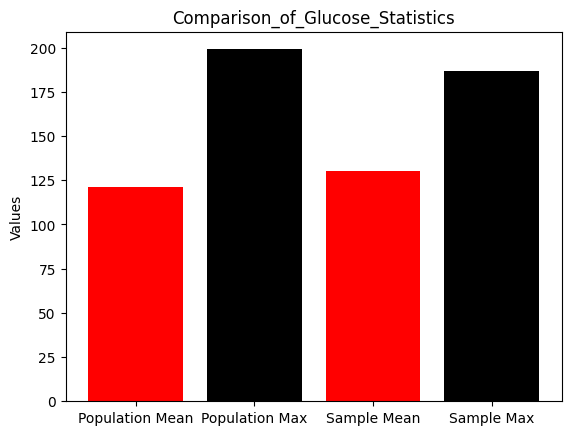

In [26]:

np.random.seed(791)


sample_data = dataa.sample(25)

populationmeanglucose = dataa['Glucose'].mean()
populationmaxglucose = dataa['Glucose'].max()

samplemeanglucose = sample_data['Glucose'].mean()
samplemaxglucose = sample_data['Glucose'].max()


# Create a bar chart for comparison
l = ['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max']
v = [populationmeanglucose, populationmaxglucose, samplemeanglucose, samplemaxglucose]

plt.bar(l, v, color=['red', 'black', 'red', 'black'])
plt.title('Comparison_of_Glucose_Statistics')
plt.ylabel('Values')
plt.show()


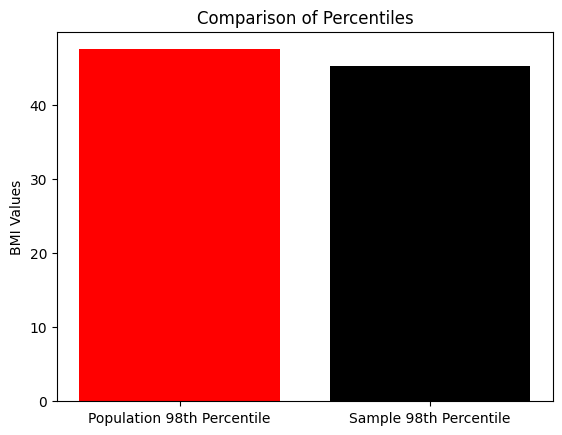

In [27]:
populationpercentile = np.percentile(dataa['BMI'], 98)
samplepercentile = np.percentile(sample_data['BMI'], 98)

l = ['Population 98th Percentile', 'Sample 98th Percentile']
v = [populationpercentile, samplepercentile]

plt.bar(l, v, color=['red', 'black'])
plt.title('Comparison of Percentiles')
plt.ylabel('BMI Values')
plt.show()

In [28]:

bootstrap_samples1 = 500
samplesize = 150


bootstrapmeans = np.zeros(bootstrap_samples1)
bootstrapstddevs = np.zeros(bootstrap_samples1)
bootstrappercentiles = np.zeros(bootstrap_samples1)


for i in range(bootstrap_samples1):
    bootstrap_sample1 = dataa['BloodPressure'].sample(samplesize, replace=True)
    bootstrapmeans[i] = bootstrap_sample1.mean()
    bootstrapstddevs[i] = bootstrap_sample1.std()
    bootstrappercentiles[i] = np.percentile(bootstrap_sample1, 98)


populationmean = dataa['BloodPressure'].mean()
populationstddev = dataa['BloodPressure'].std()
populationpercentile = np.percentile(dataa['BloodPressure'], 98)


bmean=np.mean(bootstrapmeans)
bsd=np.mean(bootstrapstddevs)
bp=np.mean(bootstrappercentiles)


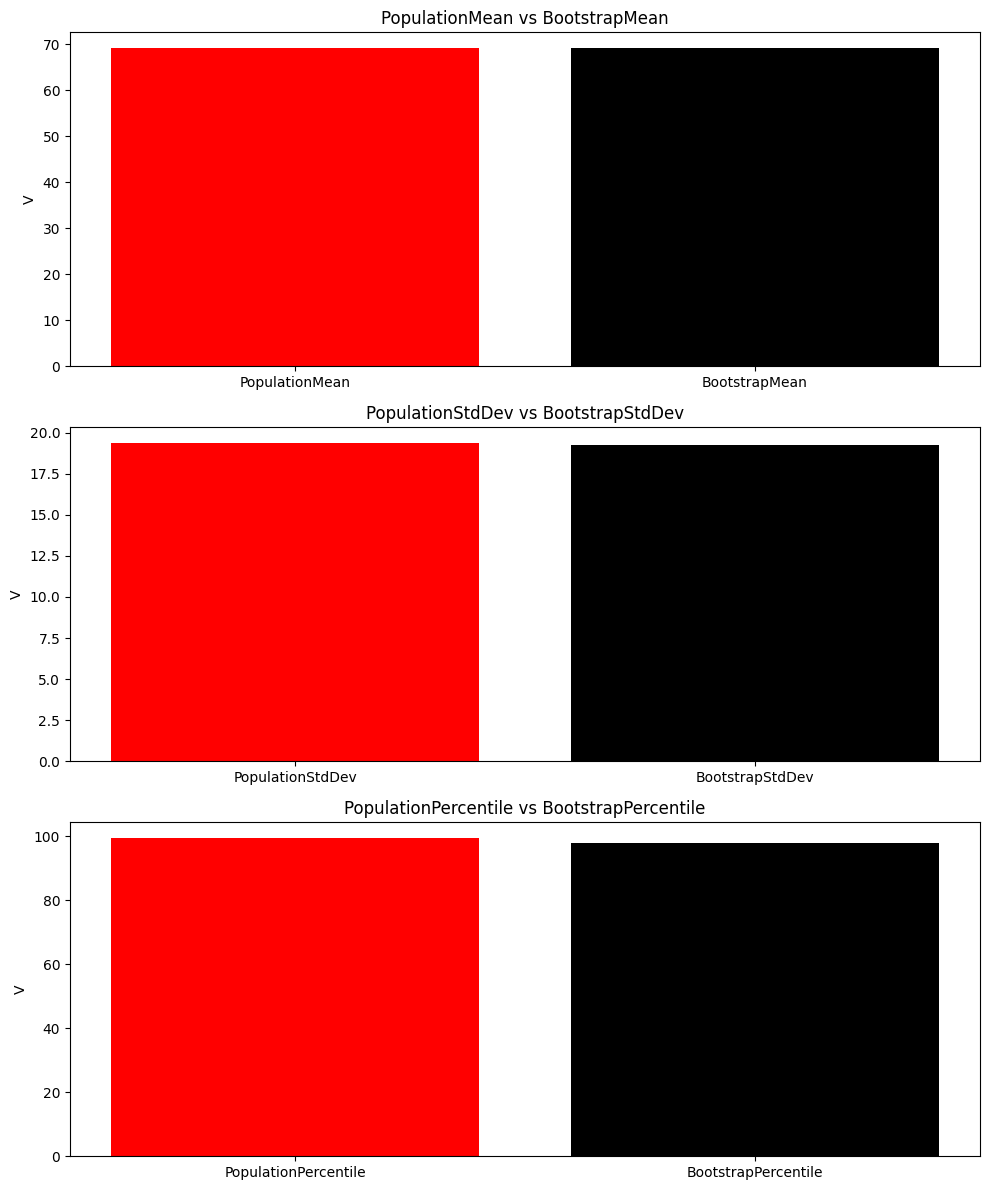

In [29]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))


axs[0].bar(['PopulationMean', 'BootstrapMean'], [populationmean, bmean], color=['red', 'black'])
axs[0].set_ylabel('V')
axs[0].set_title('PopulationMean vs BootstrapMean')


axs[1].bar(['PopulationStdDev', 'BootstrapStdDev'], [populationstddev, bsd], color=['red', 'black'])
axs[1].set_ylabel('V')
axs[1].set_title('PopulationStdDev vs BootstrapStdDev')


axs[2].bar(['PopulationPercentile', 'BootstrapPercentile'], [populationpercentile, bp], color=['red', 'black'])
axs[2].set_ylabel('V')
axs[2].set_title('PopulationPercentile vs BootstrapPercentile')

plt.tight_layout()
plt.show()